In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("data/lungCancer_train.csv",header=None)
data2 = pd.read_csv("data/lungCancer_test.csv", header=None)
data = data1.append(data2)
data_length = data.shape[1]
data_length

12534

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.DataFrame(data.values,columns=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,atribut12533
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [5]:
data = data.rename(columns={'atribut12533': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [6]:
data['status'].value_counts()

ADCA            150
Mesothelioma     31
Name: status, dtype: int64

In [7]:
data.loc[data['status'] == 'ADCA', ['status']] = 0
data.loc[data['status'] == 'Mesothelioma', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,1
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,1
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,1
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,1
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,1


In [8]:
data.shape

(181, 12534)

In [9]:
data = data.apply(pd.to_numeric)

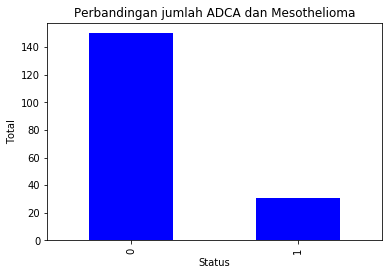

In [10]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah ADCA dan Mesothelioma")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [11]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,244.207735,46.787293,7.650276,-116.309392,21.091160,712.283425,31.027624,561.190055,1078.552486,882.119337,...,16.253039,48.505525,5.486740,136.919890,24.379558,59.979006,20.958011,44.710497,-38.600552,0.171271
std,93.719648,25.269030,27.072546,101.908620,25.519259,610.137460,95.584894,245.788947,1927.681693,344.191295,...,15.666115,33.061493,15.926834,54.241004,39.411149,42.838666,49.979540,37.167975,109.955702,0.377790
min,-11.000000,-17.800000,-69.500000,-291.100000,-121.200000,-14.400000,-84.300000,28.300000,126.900000,193.500000,...,-42.300000,-99.300000,-40.900000,-209.100000,-76.600000,-6.300000,-63.900000,-208.100000,-444.900000,0.000000
25%,190.000000,32.200000,-8.700000,-176.800000,5.500000,286.000000,-1.200000,399.900000,384.700000,624.900000,...,9.100000,35.200000,-3.200000,102.500000,1.900000,28.400000,6.600000,28.300000,-98.100000,0.000000
50%,243.200000,44.800000,5.600000,-132.700000,21.300000,538.100000,20.400000,514.000000,788.600000,815.100000,...,15.200000,52.600000,5.300000,140.500000,16.900000,49.100000,14.800000,46.100000,-61.600000,0.000000
75%,295.100000,56.400000,17.800000,-80.600000,37.300000,947.600000,40.300000,693.200000,1020.400000,1106.500000,...,22.200000,66.400000,15.100000,167.500000,37.100000,85.300000,23.500000,63.900000,3.200000,0.000000
max,549.000000,178.700000,185.100000,361.200000,76.300000,4882.000000,1004.600000,1493.500000,21804.400000,2017.800000,...,121.400000,193.700000,48.800000,283.200000,205.800000,250.000000,597.500000,143.100000,421.500000,1.000000


In [12]:
X = data.drop(['status'],axis=1)
y = data['status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [14]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [15]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

## Reduksi Dimensi 

In [16]:
# korelasi = data.corr().drop(['status'],axis=1).drop(['status'],axis=0)
# korelasi.columns

In [17]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [ 5.31798695  0.34250647  2.47137788 ... 15.0185613  68.99117701
  4.67077695]
F - score p-value  [2.22524383e-02 5.59123045e-01 1.17702159e-01 ... 1.49244171e-04
 2.37144453e-14 3.20084579e-02]


In [18]:
import random

In [19]:
def random_subset(s, n_features = 3, n_iter=10):
    listSubset = []
    for i in range(n_iter):
        listSubset.append(random.sample(list(s),n_features))
    return listSubset

In [20]:
def count_redundancy(cor):
    korr = []
    korr = cor.values
    np.fill_diagonal(korr,0)
    korr = np.concatenate(korr)
    korr = np.unique(korr)
    sum_kor = np.sum(korr)
    return sum_kor

In [21]:
def mrmr(X,y,n_features=3,n_iter=10):
    subset = random_subset(X.columns,n_features,n_iter)
    mrmr_list = []
    for i in subset:
        korelasi = X[i].corr()
        red = count_redundancy(korelasi)
        f_score, f_p_value = f_classif(X[i],y)
        rel = np.sum(f_score)
        mrmr_score = rel - ((1/len(subset))*red)
        mrmr_list.append((i,mrmr_score))
    return sorted(mrmr_list,key=lambda l:l[1],reverse=True)

In [79]:
taken_featuresTrain = mrmr(X_train,y_train,50,10)[0][0]
taken_featuresTrain

['atribut4473',
 'atribut1955',
 'atribut4399',
 'atribut9237',
 'atribut1220',
 'atribut7571',
 'atribut1576',
 'atribut5800',
 'atribut12508',
 'atribut8690',
 'atribut11043',
 'atribut7969',
 'atribut11501',
 'atribut768',
 'atribut9074',
 'atribut6663',
 'atribut7812',
 'atribut8843',
 'atribut4451',
 'atribut11885',
 'atribut1545',
 'atribut11160',
 'atribut8780',
 'atribut8898',
 'atribut9705',
 'atribut10273',
 'atribut3934',
 'atribut5971',
 'atribut2976',
 'atribut8041',
 'atribut230',
 'atribut4607',
 'atribut4211',
 'atribut108',
 'atribut10601',
 'atribut12427',
 'atribut10082',
 'atribut1403',
 'atribut11908',
 'atribut12517',
 'atribut787',
 'atribut12158',
 'atribut7246',
 'atribut10600',
 'atribut397',
 'atribut8474',
 'atribut9543',
 'atribut3678',
 'atribut9794',
 'atribut215']

In [80]:
X_train_mrmr = X_train[taken_featuresTrain].copy()

In [81]:
taken_featuresTest = mrmr(X_test,y_test,50,10)[0][0]
taken_featuresTest

['atribut8533',
 'atribut10993',
 'atribut9931',
 'atribut3309',
 'atribut8497',
 'atribut8835',
 'atribut10273',
 'atribut8215',
 'atribut6369',
 'atribut8361',
 'atribut2212',
 'atribut3808',
 'atribut2324',
 'atribut3907',
 'atribut9577',
 'atribut1723',
 'atribut5162',
 'atribut5504',
 'atribut129',
 'atribut11821',
 'atribut11701',
 'atribut6887',
 'atribut1125',
 'atribut6433',
 'atribut7547',
 'atribut4322',
 'atribut324',
 'atribut5089',
 'atribut11399',
 'atribut11648',
 'atribut10138',
 'atribut1603',
 'atribut2162',
 'atribut10269',
 'atribut4669',
 'atribut11416',
 'atribut9012',
 'atribut7060',
 'atribut8972',
 'atribut12340',
 'atribut5534',
 'atribut3293',
 'atribut2720',
 'atribut232',
 'atribut1883',
 'atribut8134',
 'atribut7418',
 'atribut8227',
 'atribut3920',
 'atribut11528']

In [82]:
X_test_mrmr = X_test[taken_featuresTest].copy()

In [83]:
model_rfg = RandomForestClassifier()

In [84]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [85]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_mrmr, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [86]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.875 (+/-0.034) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.882 (+/-0.052) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.882 (+/-0.052) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.924 (+/-0.052) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.868 (+/-0.039) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.875 (+/-0.059) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.882 (+/-0.079) for {'n_estimators': 400, 'min_samples_split': 2, 

In [87]:
random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [88]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [89]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_train_mrmr, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.9s finished


Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}

0.917 (+/-0.068) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.938 (+/-0.068) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.924 (+/-0.052) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.924 (+/-0.052) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.931 (+/-0.052) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [90]:
classifier = grid_search.best_estimator_

In [91]:
classifier.fit(X_train_mrmr, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
prediksi = classifier.predict(X_test_mrmr)
prediksi

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [93]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
164,0,0
101,0,0
45,1,1
28,0,0
150,0,0
10,1,1
0,1,1
3,1,0
64,0,0
135,0,1


In [94]:
accuracy_score(y_test,prediksi)

0.6486486486486487

In [95]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.31      0.71      0.43         7

    accuracy                           0.65        37
   macro avg       0.61      0.67      0.59        37
weighted avg       0.79      0.65      0.69        37



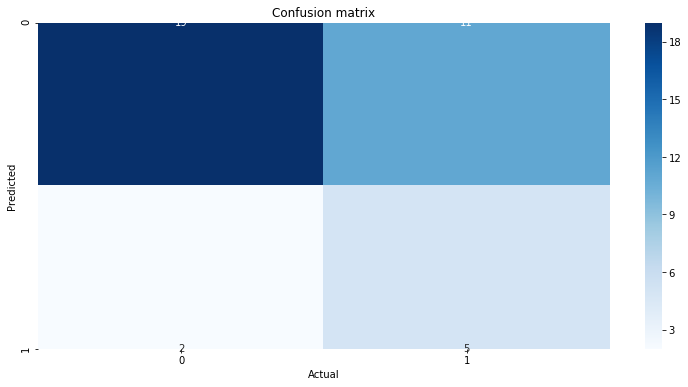

In [96]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [97]:
confusion_matrix(y_test,prediksi)

array([[19, 11],
       [ 2,  5]], dtype=int64)